In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_or = pd.read_csv('antiviral_original.csv')
df_o=pd.read_csv('antiviral_object.csv')
df_f = pd.read_csv('antiviral.csv')

In [3]:
df_or.shape, df_o.shape, df_f.shape

((5958, 11), (57, 5), (146, 5))

In [4]:
df_or.describe()

,Sequence,Source,Target_Organism,Assay,Linear_Cyclic,N-terminal_Modification,C-terminal_Modification,Other_Modification,Binding_Target,experimental_characteristics,Half_Life
count,5958,5955,5958,5259,5958,5958,5958,912,5955,5958,5838
unique,1852,185,105,123,4,20,33,164,62,3,22
top,SLDQINVTFLDLEYEMKKLEEAIKKLEESYIDLKELGSGSG,Synthetic construct,HIV,ELISA,Linear,Free,Free,"The 'X' at position 4,8,11,15 indicates S-pent...",Not found,E_coli,>10 hour
freq,27,2460,2148,393,5466,4521,4011,48,1755,1986,1149


In [5]:
df_o.describe()

,sequence,half_life,is_mod,modifications,experimental_characteristics
count,57,57,57,14,57
unique,57,2,2,5,3
top,AACEVAKNLNESLIDLQELGKYEQYIKW,>20 hour,False,"Acetylation, Amidation",Yeast
freq,1,44,43,8,27


In [6]:
df_f.describe()

,half_life_seconds
count,146.000000
mean,4941.780822
std,31675.110030
min,120.000000
25%,120.000000
50%,120.000000
75%,120.000000
max,360000.000000


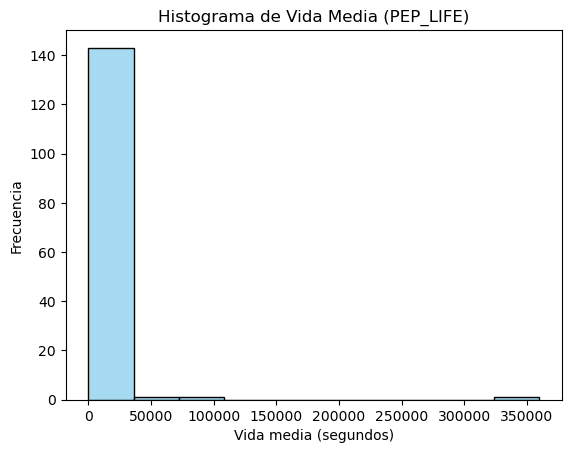

In [7]:
sns.histplot(df_f['half_life_seconds'], bins=10, color='skyblue', kde=False)

plt.xlabel('Vida media (segundos)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Vida Media (PEP_LIFE)')
plt.show()

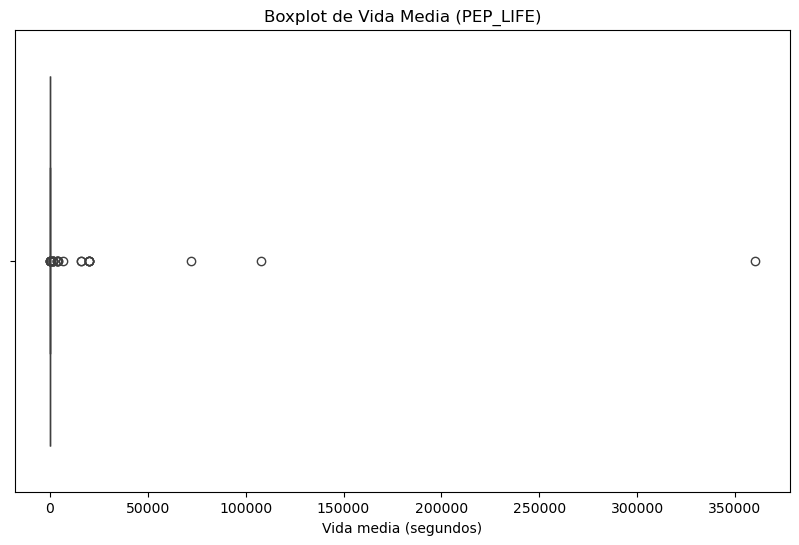

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='half_life_seconds', data=df_f)
plt.title('Boxplot de Vida Media (PEP_LIFE)')
plt.xlabel('Vida media (segundos)')
plt.show()

In [9]:
df_o['is_mod'].value_counts()

is_mod
False    43
True     14
Name: count, dtype: int64

In [10]:
df_f['is_mod'].value_counts()

is_mod
False    103
True      43
Name: count, dtype: int64